<a href="https://colab.research.google.com/github/roseleen-kaur/DataAnalytics_2022_Summer/blob/main/R_Kaur_Quiz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quiz 3#
Roseleen Kaur

<small> I used the Udemy to help on this. <small>

My questions

##Data Summary##


###Attributes##
![picture](https://drive.google.com/uc?id=1pvg98R7UXrRtve2rdsIXwJrSwxEx-xCS)

Further Explaination on some attributes:

Wine is generallly made of fermented grapes. When the grapes ferment you ge tthings such as Acid, Chloride, Citric Acid, Residual Suger, Sulfur and so on.

Wine Acid Index:

Fundamentally speaking, all wines lie on the acidic side of the pH spectrum, and most range from 2.5 to about 4.5 pH (7 is neutral).


What does Chloride do in Wine?
 
 "[Wine](https://www.scielo.br/j/cta/a/HQsrPrPMNZYgRzSKtrjHyHh/?format=pdf&lang=en#:~:text=Wine%20contains%20from%202%20to,2003%3B%20Maltman%2C%202013) contains from 2 to 4 g L–1 of salts of mineral acids,along with some organic acids, and they may have a key role
on a potential salty taste of a wine, with chlorides being a major
contributor to saltiness."
  Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes.
  So the higher the level of chloride in the wine, the saltier it is. The saltier is it the less people will drink it. 

What does Citric Acid do in Wine?

  [Citric acid](https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid#:~:text=Citric%20acid%20is%20often%20added,give%20a%20%E2%80%9Cfresh%E2%80%9D%20flavor.) is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor.

Citric Acid usually used with two other acids, Malic Acid and Tartaric Acid. The acids are balanced to help keep the yeast in the wine from fermenting.  

What is the Density of the Wine?

The [density](https://www.etslabs.com/analyses/DEN) of wine is primarily determined by the concentration of alcohol, sugar, glycerol, and other dissolved solids. But the Density of wine has little effect on the quality of the wine. 

Volatile Acidity?

[Volatile](https://extension.psu.edu/volatile-acidity-in-wine#:~:text=Volatile%20acidity%20(VA%20is%20a,taste%20of%20vinegar%20in%20wine) acidity (VA) is a measure of the wine's gaseous acids that contributes to the smell and taste of vinegar in wine.
In [quantities](https://wineguy.nz/index.php/glossary-articles-hidden/482-volatile-acidity) of 0.2 to 0.4 g/L, volatile acidity does not affect a wine's quality. At higher levels, however, VA can give wine a sharp, vinegary tactile sensation, which is caused by acetic acid. Extreme volatile acidity signifies a seriously faulty wine, and can be referred to as volatile.



In [19]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv', index_col = 0)

#store copy of original
org_df = df
df.shape
df.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
INDEX,,,,,,,,,,,,,,,
1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


Just looking over the data we can see that:
- There's negative values in Citric Chlorides, Total SulfurDioxide, Sulphates. Maybe we cna conclude that the data hasn't been properly normlaized.


In [6]:
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])

df_info['NUnique'] = df.nunique()
df_info['Missing Vals'] = df.isnull().sum()
df_info['Count'] = df.count()
df_info['Zeros'] = (df==0).sum()
df_info['?'] = (df=='?').sum()


df_info

,Dtype,NUnique,Missing Vals,Count,Zeros,?
TARGET,int64,9,0,12795,2734,0
FixedAcidity,float64,470,0,12795,39,0
VolatileAcidity,float64,815,0,12795,18,0
CitricAcid,float64,602,0,12795,115,0
ResidualSugar,float64,2077,616,12179,6,0
Chlorides,float64,1663,638,12157,5,0
FreeSulfurDioxide,float64,999,647,12148,11,0
TotalSulfurDioxide,float64,1370,682,12113,7,0
Density,float64,5933,0,12795,0,0
pH,float64,497,395,12400,0,0


Then we can visualize the amount of missing data here with missingno.

In [11]:
df.isnull().sum()

TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

In [ ]:
#shows the missing data only
miss = df.isnull().sum()
miss = miss[miss>0]
miss.sort_values(inplace = True)
miss

pH                     395
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
Alcohol                653
TotalSulfurDioxide     682
Sulphates             1210
STARS                 3359
dtype: int64

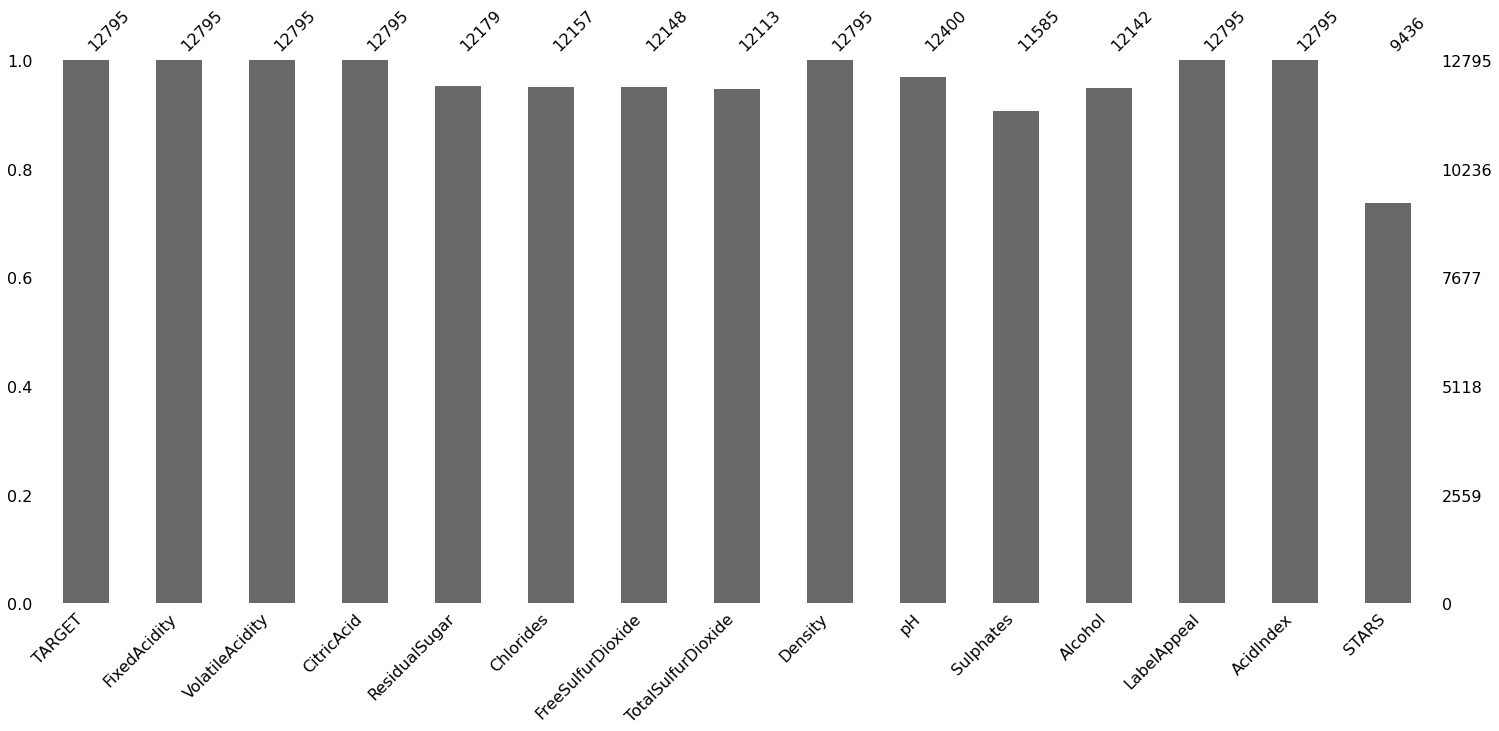

In [12]:
msno.bar(df)

As you can see there some columns that are missing data, such as; Chlorides, TotalSulfurDioxide, ResidualSugar, FreeSulfurDioxid, pH, Sulphates, Alchohol, STARS.

Stars has the most mising data. Seems like many wines don't have a rating. 

In [ ]:
df.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


There are some data problems here. For example the minimums. There shouldn't be minimums in any of these columns other than label appeal. That is because you can't have a negative Acidity, or alcholhol, or choride etc.
That means we need to clean up this data.

##Missing Data##


Number of completed rows without missing values


In [ ]:
df.shape[0] - df.isnull().sum(axis =0).shape[0]

12780

<function matplotlib.pyplot.show>

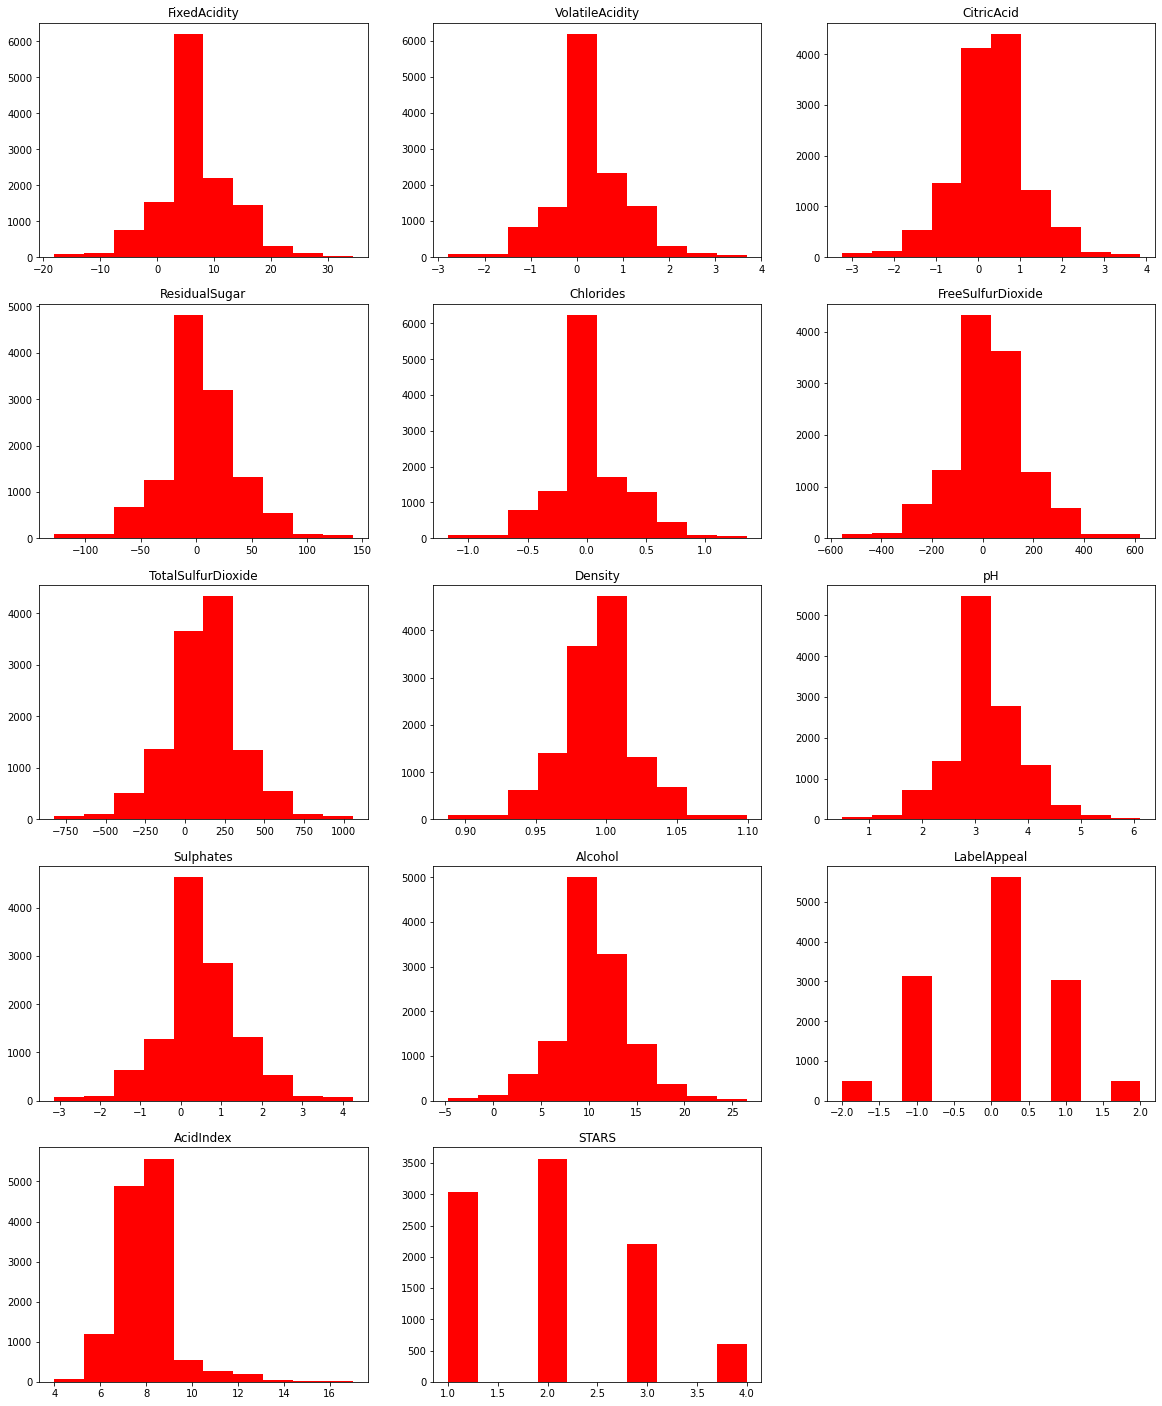

In [7]:
#making a hitogram for the columns
plt.figure(figsize=(20,25))

import warnings
warnings.filterwarnings("ignore")

j=1 
columns = df.columns.tolist() #makes lists of the cols 
for k in columns[1:]:
  plt.subplot(5,3,j)
  plt.hist(df[k], color= 'red')
  plt.title('%s' %k)
  j=j+1 #the way to map the plots in the output

plt.show


The data looks very evenly distributed.

<function matplotlib.pyplot.show>

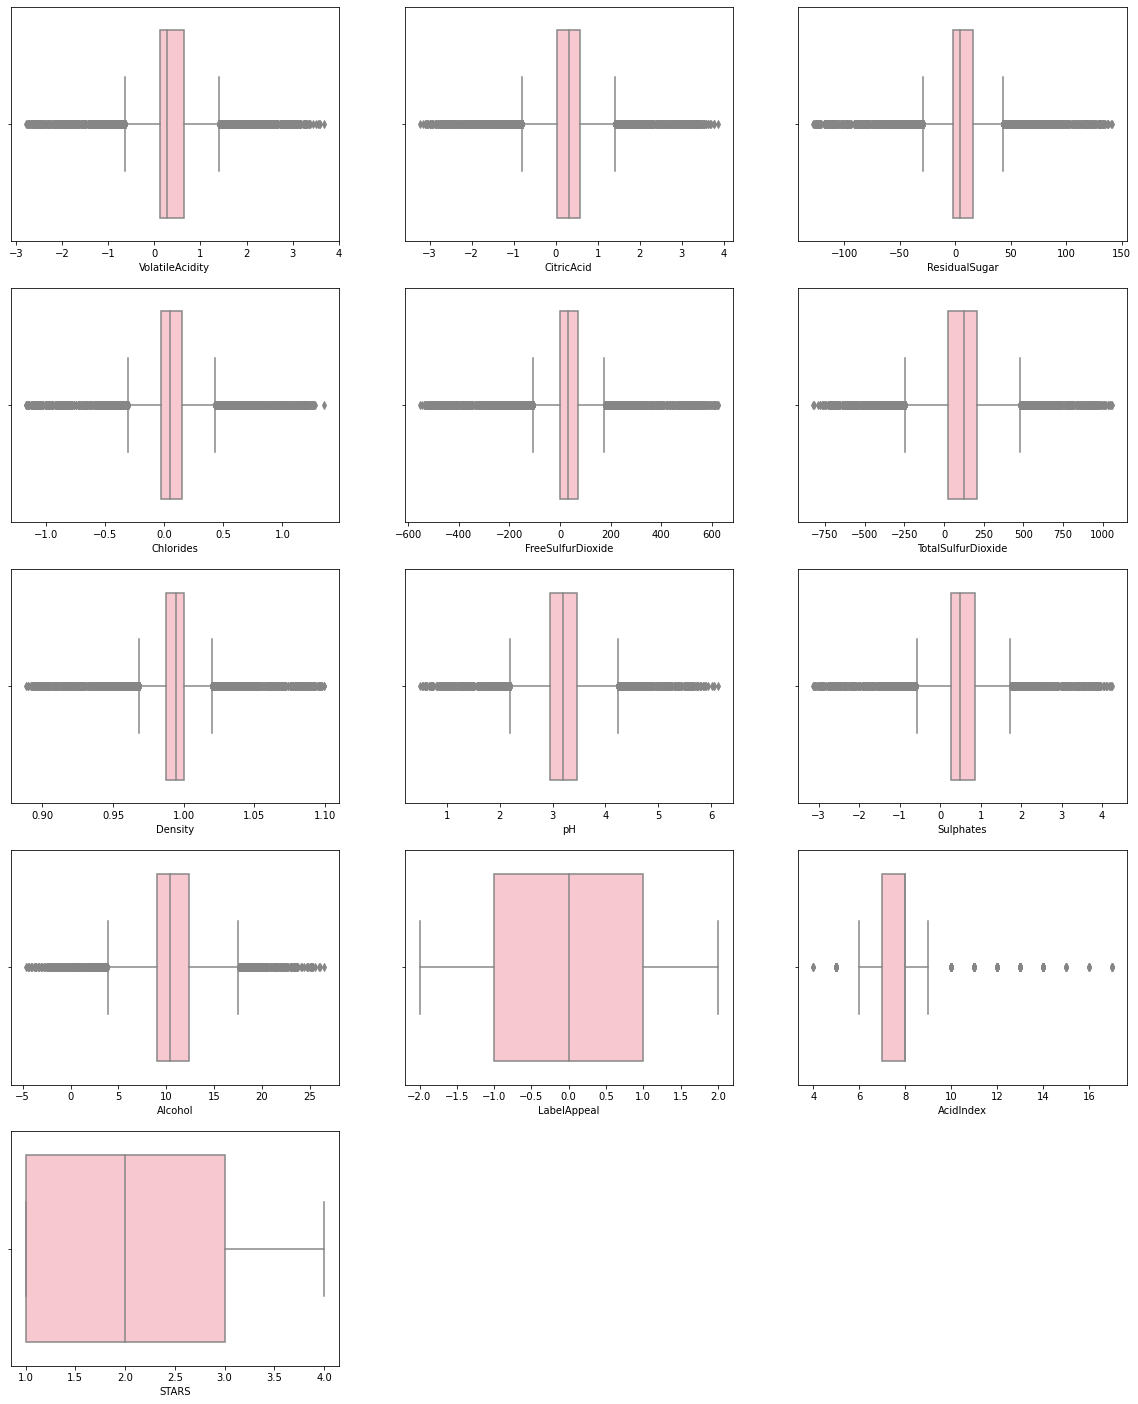

In [6]:
#box plots to check any outliers
plt.figure(figsize=(20,25))

import warnings
warnings.filterwarnings("ignore")

j=1 
columns = df.columns.tolist() #makes lists of the cols 
for k in columns[2:]:
  plt.subplot(5,3,j)
  sns.boxplot(x=k, data = df, color= 'pink')
  j=j+1 #the way to map the plots in the output

plt.show

There are quite a bit of outliers for each column.

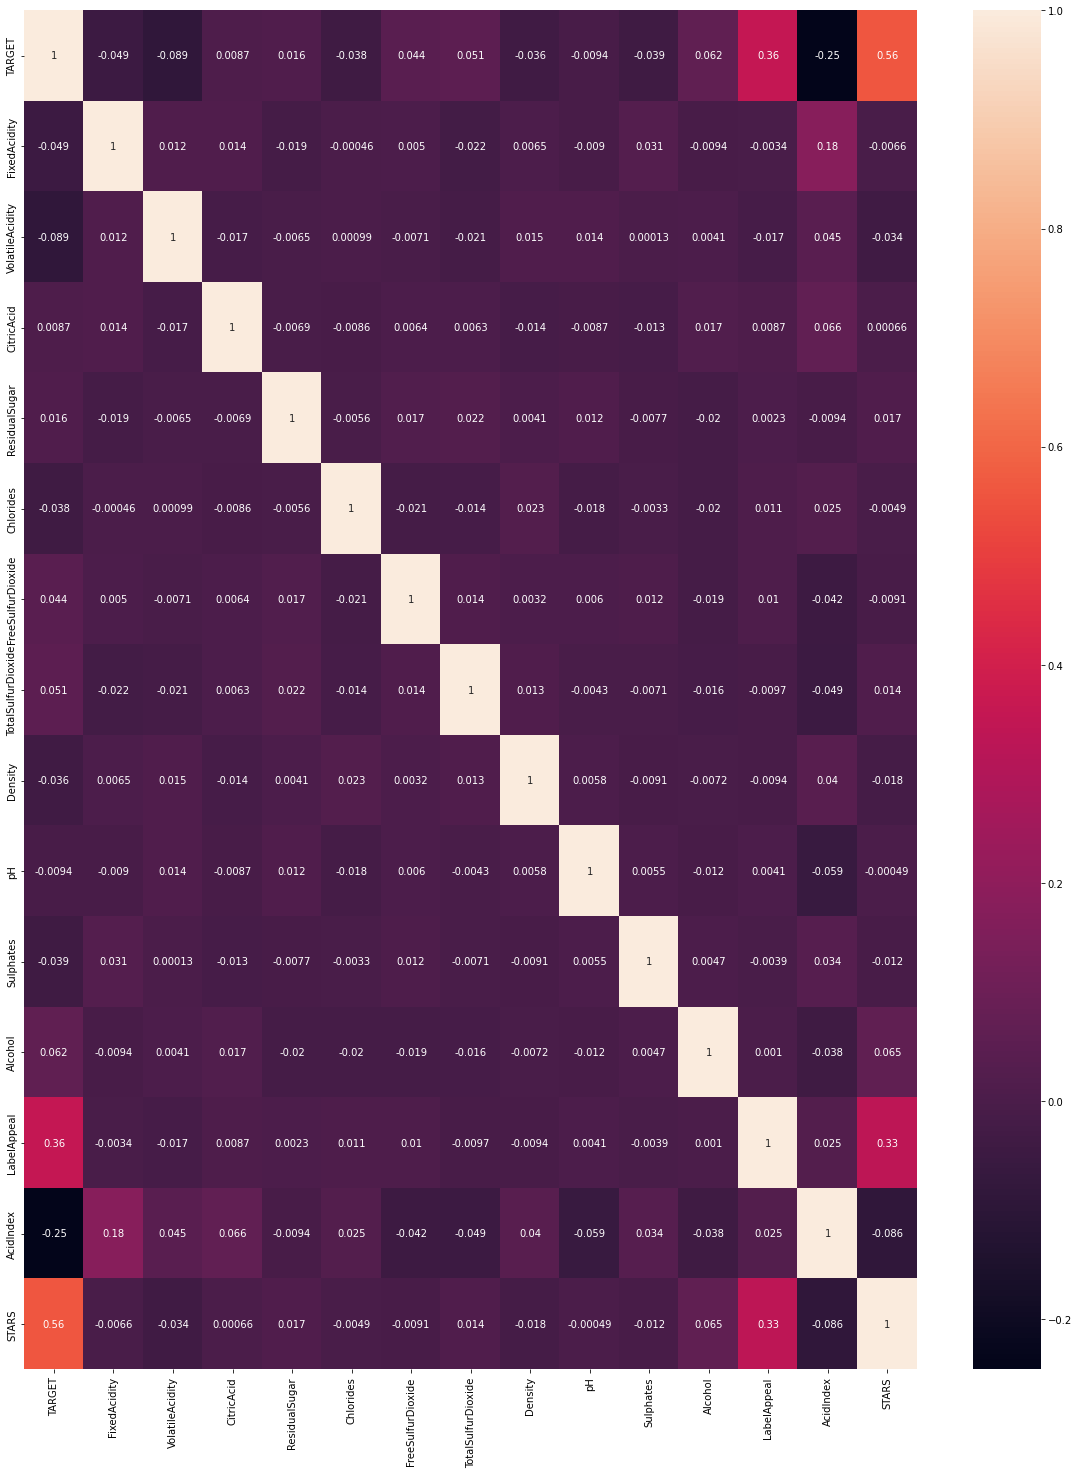

In [8]:
#making a corr matrix with a heatmap
fig = plt.figure(figsize=(20,25))
corrmat = df.corr()

sns.heatmap(corrmat, annot=True)

fig.suptitle = ("HeatMap")



There doesn't seem to be much correlation other than Target, Starts, Acid Index and Label Appeal.

##Cleaning Data##
 We take the absolute value of all of the data because as mentioned earlier, we do not need any negatives other than label appeal.

In [17]:
#columns = df.columns.tolist()
#for i in columns[0:]:
#  if i != df['LabelAppeal']:
#     df = abs(df)
#df
#I thought that would make everything except that abs but it didnt work
df_new = abs(df)

In [21]:
#filling nans with medians 
#i filled sugars with mean because there should be an avg amount of sugar
df_new['pH'] = df_new['pH'].fillna(df_new['pH'].median())
df_new['ResidualSugar'] = df_new['ResidualSugar'].fillna(df_new['ResidualSugar'].mean())
df_new['Chlorides'] = df_new['Chlorides'].fillna(df_new['Chlorides'].median())
df_new['FreeSulfurDioxide'] = df_new['FreeSulfurDioxide'].fillna(df_new['FreeSulfurDioxide'].median())
df_new['Alcohol'] = df_new['Alcohol'].fillna(df_new['Alcohol'].median())
df_new['TotalSulfurDioxide'] = df_new['TotalSulfurDioxide'].fillna(df_new['TotalSulfurDioxide'].median())
df_new['Sulphates'] = df_new['Sulphates'].fillna(df_new['Sulphates'].median())
df_new['STARS'] = df_new['STARS'].fillna(df_new['STARS'].median())

In [23]:
df_new.isnull().sum()

TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64

In [ ]:
#i still need to finish cleaning the data

#My Question is:#
How does the volatile acidity, chlorine and fixed acidity affect the pH of the wine. 

First I will take the cols I want and make a seperate graph with those to answer my question. Checking the relationship between these features.


In [ ]:
#i would have checked if the correlaton between these 3 was any different after cleaning up the data 
#that would've told me whether they depend on each other or not. 
#i ran out of time

#References#
- https://www.scielo.br/j/cta/a/HQsrPrPMNZYgRzSKtrjHyHh/?format=pdf&lang=en#:~:text=Wine%20contains%20from%202%20to,2003%3B%20Maltman%2C%202013) for wine chloride info
- https://www.etslabs.com/analyses/DEN 
- https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid#:~:text=Citric%20acid%20is%20often%20added,give%20a%20%E2%80%9Cfresh%E2%80%9D%20flavor. 